In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
4402,200808,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,International,Canada,Deplaned,Other,International,G,1903,Deplaned,1903,2008,August
13581,201504,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Deplaned,Other,International,A,7479,Deplaned,7479,2015,April
8981,201112,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Other,International,A,6735,Deplaned,6735,2011,December
8850,201111,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,3345,Enplaned,3345,2011,November
3829,200803,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,8693,Enplaned,8693,2008,March


In [49]:
#немного переведем dataset в цифровой вид из строк
df['GEO Summary'] = df['GEO Summary'].replace(['International', 'Domestic'], [1,0])
df['Month'] = df['Month'].replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], [1,2,3,4,5,6,7,8,9,10,11,12])
df['Activity Type Code'] = df['Activity Type Code'].replace(['Deplaned', 'Enplaned', r'Thru.*'], [0,1,2], regex=True)
df[0:5]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,0,US,0,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,7
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,0,US,1,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,7
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,0,US,2,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,7
3,200507,Air Canada,AC,Air Canada,AC,1,Canada,0,Other,Terminal 1,B,35156,Deplaned,35156,2005,7
4,200507,Air Canada,AC,Air Canada,AC,1,Canada,1,Other,Terminal 1,B,34090,Enplaned,34090,2005,7


In [50]:
df.info() #общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  int64 
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  int64 
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [51]:
df.describe() #общие статистики

,Activity Period,GEO Summary,Activity Type Code,Passenger Count,Adjusted Passenger Count,Year,Month
count,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,0.613714,0.590125,29240.521090,29331.917105,2010.385220,6.551343
std,313.336196,0.486914,0.603748,58319.509284,58284.182219,3.137589,3.464354
min,200507.000000,0.000000,0.000000,1.000000,1.000000,2005.000000,1.000000
25%,200803.000000,0.000000,0.000000,5373.500000,5495.500000,2008.000000,3.000000
50%,201011.000000,1.000000,1.000000,9210.000000,9354.000000,2010.000000,7.000000
75%,201308.000000,1.000000,1.000000,21158.500000,21182.000000,2013.000000,10.000000
max,201603.000000,1.000000,2.000000,659837.000000,659837.000000,2016.000000,12.000000


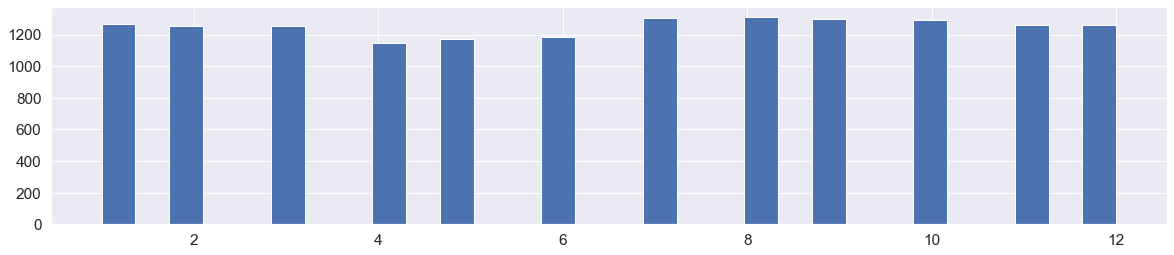

In [52]:
df['Month'].hist(bins=30, figsize=(20,4)); # как распределены перелеты по месяцам

In [53]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [54]:
df[df['Year']>2015]['Passenger Count'].count()

371

In [55]:
df[df['Year']>2015]['Passenger Count'].sum()

11429847

In [56]:
# попробуем предсказать:
#  - количество пассажиров 

In [57]:
df.columns # список столбцов нашего датасета 

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [58]:
col=['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'] 

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [59]:
# результат, подготовленные данные
X.sample(3)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
11751,201312.0,50,48,44,42,0.0,0,0.0,0,1,2,46125.0,0,46125.0,2013.0,12.0
2889,200708.0,6,6,6,6,1.0,5,1.0,1,1,2,8354.0,1,8354.0,2007.0,8.0
11928,201402.0,1,1,1,1,1.0,1,1.0,1,1,1,14742.0,1,14742.0,2014.0,2.0


In [60]:
# Y будет равен нулю если количество пассажиров 10000 и меньше, и единице если больше 10000
Y=df['Passenger Count'].apply(lambda x: 1 if x>10000 else 0).values

In [61]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.5513, 'Passenger Count'],
 [0.3743, 'Adjusted Passenger Count'],
 [0.0247, 'GEO Region'],
 [0.0093, 'Adjusted Activity Type Code'],
 [0.009, 'GEO Summary'],
 [0.0074, 'Activity Type Code'],
 [0.0066, 'Operating Airline'],
 [0.0059, 'Published Airline'],
 [0.0056, 'Published Airline IATA Code'],
 [0.0023, 'Operating Airline IATA Code'],
 [0.0018, 'Boarding Area'],
 [0.0006, 'Activity Period'],
 [0.0005, 'Terminal'],
 [0.0004, 'Year'],
 [0.0001, 'Month'],
 [0.0, 'Price Category Code']]

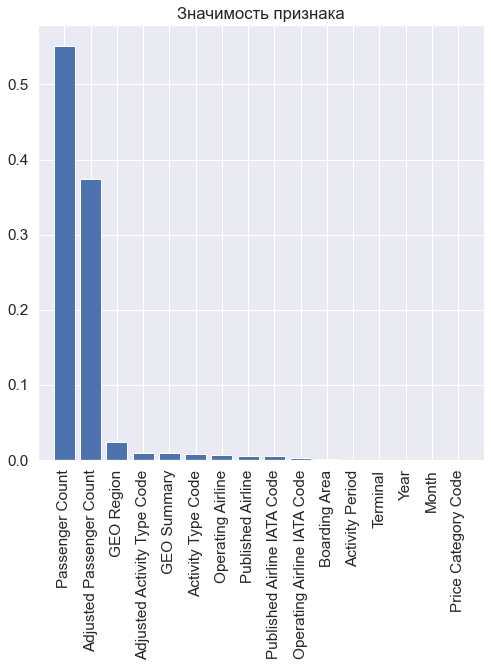

In [64]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [65]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [66]:
# как выглядядт результаты тестового набора
y_test

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [67]:
# метрика r2
r2_score(model.predict(X_test), y_test)

1.0

In [68]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 1.0


In [69]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[1650,    0],
       [   0, 1352]], dtype=int64)

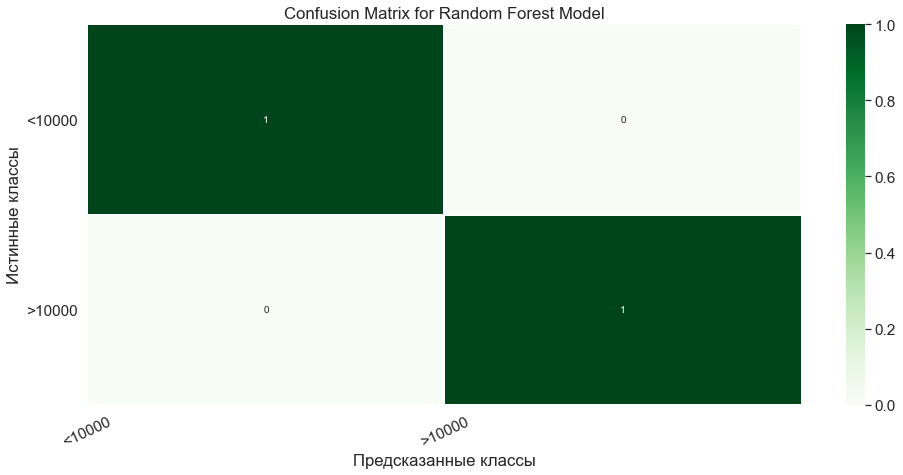

In [70]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<10000', '>10000']                 # !!!!!! указать названия классов!
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [71]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1650
           1       1.00      1.00      1.00      1352

    accuracy                           1.00      3002
   macro avg       1.00      1.00      1.00      3002
weighted avg       1.00      1.00      1.00      3002

